# 1. 논리 회귀
논리 회귀(Logistic Regression)는 주어진 입력 데이터를 기반으로 두 가지 이상의 범주로 분류하는 지도 학습 알고리즘입니다. 주로 이진 분류 문제에 사용되며, 입력 변수의 선형 결합을 통해 특정 사건이 발생할 확률을 예측합니다. 이 알고리즘은 시그모이드(Sigmoid) 함수 또는 로지스틱 함수라는 비선형 함수를 사용하여 예측값을 0과 1 사이의 확률로 변환합니다. 모델의 결과는 일반적으로 특정 임계값(예: 0.5)을 기준으로 두 범주 중 하나로 분류됩니다. 예를 들어, 이메일이 스팸인지 아닌지를 판별하거나 환자의 병 진단 여부를 예측하는 데 사용될 수 있습니다. 논리 회귀는 계산이 비교적 간단하고 해석이 용이하여 머신러닝에서 널리 사용되는 알고리즘입니다.

### ※ 시그모이드 함수

시그모이드 함수(Sigmoid Function)는 입력 값을 받아서 이를 0과 1 사이의 값으로 변환하는 수학 함수입니다. 주로 확률을 예측해야 하는 문제에서 사용됩니다. 논리 회귀(Logistic Regression)와 인공신경망(Artificial Neural Network)에서 매우 중요한 역할을 합니다. (e: 자연 상수로, 약 2.718입니다.)

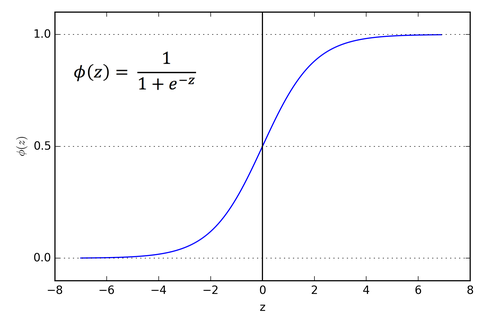

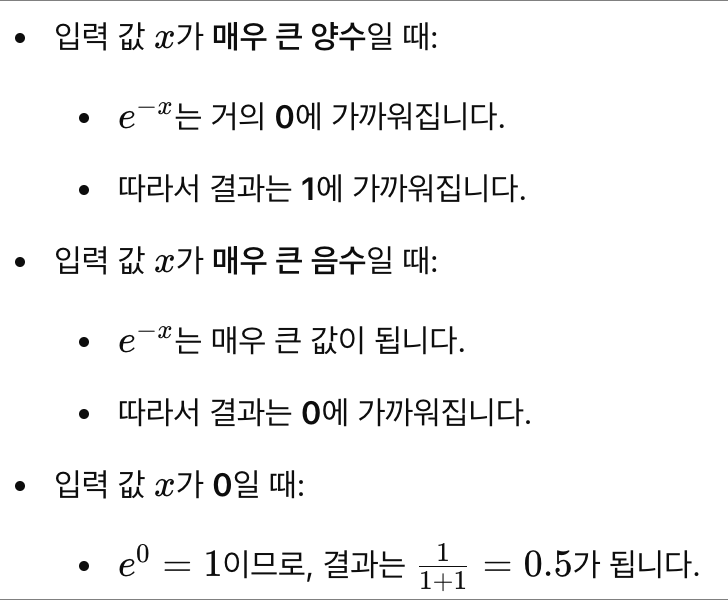

# 2. 단항 논리 회귀
단항 논리 회귀 (Univariate Logistic Regression)는 하나의 독립 변수(입력 변수)를 사용하여 이진 분류 문제를 해결하는 논리 회귀(Logistic Regression)의 한 형태입니다. 예를 들어, 학생의 하루 공부 시간(독립 변수)에 따라 시험 합격 여부(종속 변수: 합격/불합격)를 예측하는 경우가 여기에 해당합니다. 단항 논리 회귀는 입력 변수의 값을 시그모이드(Sigmoid) 함수에 전달하여 해당 사건(예: 합격)이 발생할 확률(0과 1 사이의 값)을 계산합니다. 이후 이 확률 값이 특정 임계값(일반적으로 0.5)을 초과하면 한 클래스로, 그렇지 않으면 다른 클래스로 분류합니다. 단항 논리 회귀는 간단하면서도 직관적이어서 이진 분류 문제를 설명하고 해석하는 데 자주 사용됩니다.

In [ ]:
import torch
import torch.nn as nn

x = torch.tensor([1.0, 2.0, 3.0])
w = torch.tensor([0.1, 0.2, 0.3])
b = torch.tensor(0.5)

# z = W1*x1 + W2*x2 + W3*x3 + b
# z = 0.1*1.0 + 0.2*2.0 + 0.3*3.0 + 0.5
z = torch.dot(w, x) + b
print(z) # tensor(1.9000)


# 시그모이드 적용해보기

sigmoid = nn.Sigmoid()
output = sigmoid(z)
print(output) # tensor(0.8699)

'''
“0.8699”는 0에서 1 사이로 압축된 값으로, 보통 로지스틱 회귀에서는
“양성(Positive) 클래스일 확률이 약 87%”라고 해석합니다.

만약 임계값(threshold)을 0.5로 잡는다면,
이 예제에서는 0.8699 > 0.5 이므로 “1(Positive)”로 분류하겠죠.
'''

tensor(1.9000)
tensor(0.8699)


torch.Size([8, 1])
torch.Size([8, 1])


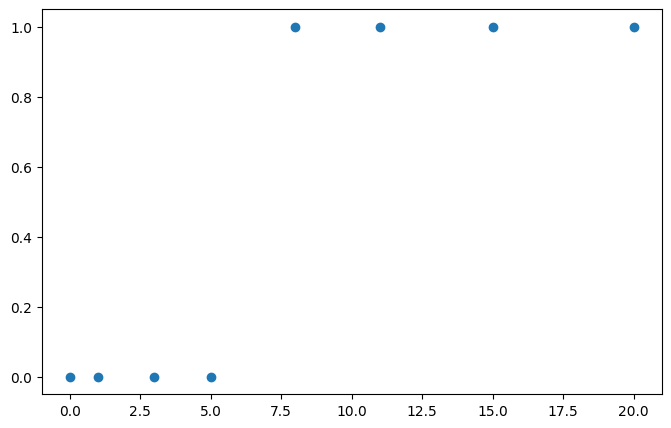

In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt

torch.manual_seed(2025)

x_train = torch.FloatTensor([[0], [1], [3], [5], [8], [11], [15], [20]]) #공부한 시간
y_train = torch.FloatTensor([[0], [0], [0], [0], [1], [1], [1], [1]]) #자격증 취득 여부
print(x_train.shape)
print(y_train.shape)

plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train)

In [ ]:
model = nn.Sequential(
    nn.Linear(1, 1), # 여기에서 나온 결과를 sigmoid에 넣어주겠다.
    nn.Sigmoid()
)

model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
)

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[0.3699]], requires_grad=True),
 Parameter containing:
 tensor([0.8711], requires_grad=True)]

In [ ]:
y_pred = model(x_train)
y_pred

tensor([[0.7050],
        [0.7757],
        [0.8788],
        [0.9382],
        [0.9788],
        [0.9929],
        [0.9984],
        [0.9997]], grad_fn=<SigmoidBackward0>)

### BCE 손실 함수

Binary Cross Entropy (BCE)는 이진 분류 문제에서 모델이 예측한 확률 분포와 실제 정답 레이블 사이의 차이를 측정하는 손실 함수(Loss Function)입니다. BCE는 예측된 확률 값과 실제 값(0 또는 1) 사이의 차이를 로그 확률로 변환하여 손실을 계산합니다.

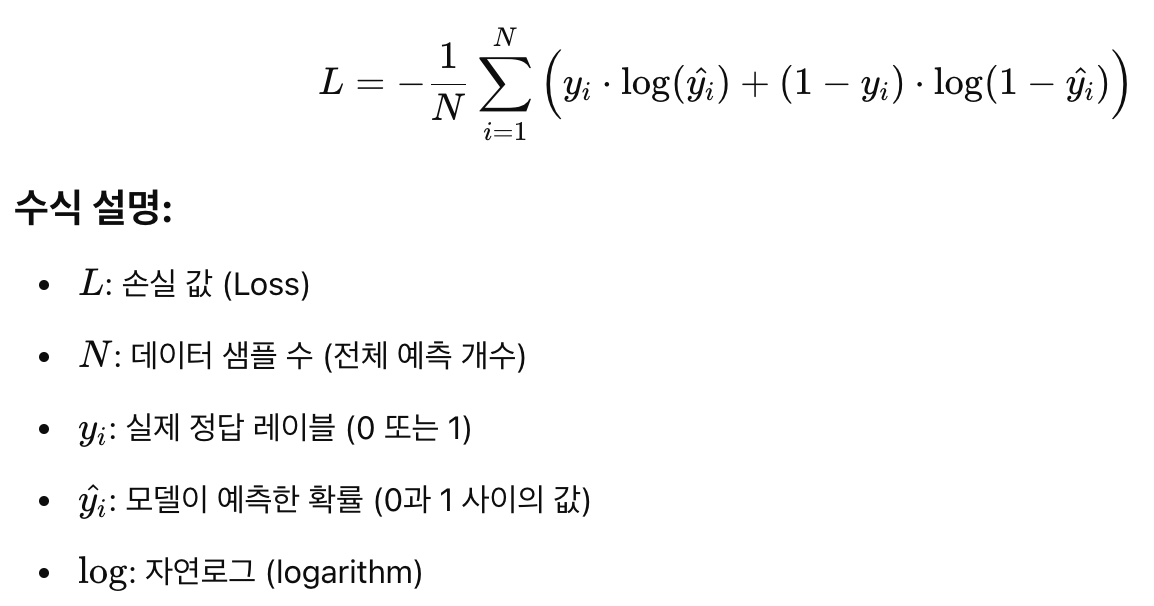


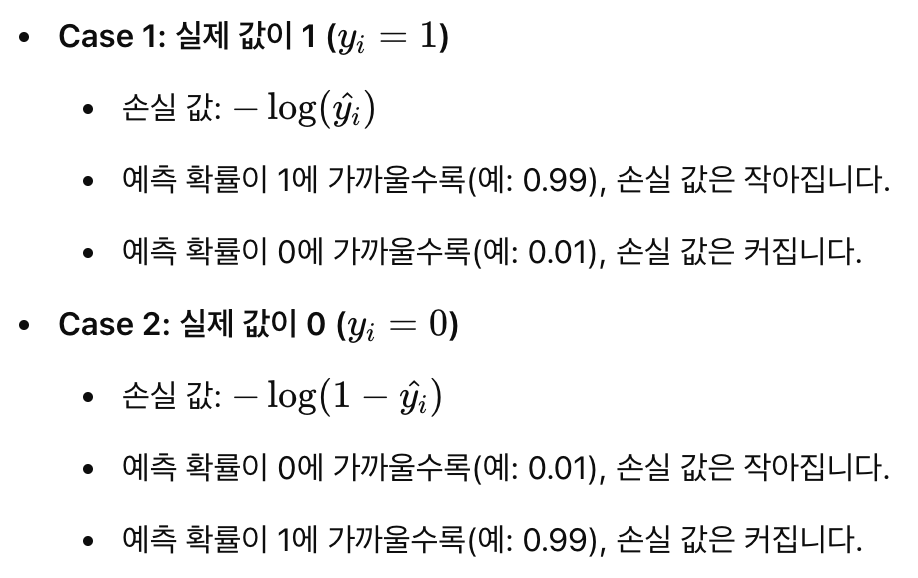

In [ ]:
loss = nn.BCELoss()(y_pred, y_train)
loss

tensor(0.9551, grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.BCELoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}/{epochs} Loss: {loss:.6f}')

Epoch: 0/1000 Loss: 0.955088
Epoch: 100/1000 Loss: 0.656269
Epoch: 200/1000 Loss: 0.587461
Epoch: 300/1000 Loss: 0.529375
Epoch: 400/1000 Loss: 0.480471
Epoch: 500/1000 Loss: 0.439265
Epoch: 600/1000 Loss: 0.404423
Epoch: 700/1000 Loss: 0.374805
Epoch: 800/1000 Loss: 0.349462
Epoch: 900/1000 Loss: 0.327626
Epoch: 1000/1000 Loss: 0.308673


In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[0.2780]], requires_grad=True),
 Parameter containing:
 tensor([-1.1653], requires_grad=True)]

In [ ]:
x_test = torch.FloatTensor([[10]])
y_pred = model(x_test)
y_pred

tensor([[0.8341]], grad_fn=<SigmoidBackward0>)

In [ ]:
# 임계치 설정하기
# 0.5보다 크거나 같으면 1
# 0.5보다 작으면 0
y_bool = (y_pred >= 0.5).float()
y_bool

tensor([[1.]])

# 3. 다항 논리 회귀
다항 논리 회귀(Multinomial Logistic Regression)는 종속 변수가 세 개 이상의 범주로 나뉘는 다중 클래스 분류 문제를 해결하는 알고리즘입니다. 예를 들어, 과일의 색깔이 빨강, 노랑, 초록 중 하나로 분류되는 문제에서 사용할 수 있습니다. 이 알고리즘은 각 클래스에 대한 확률을 예측하기 위해 소프트맥스(Softmax) 함수를 사용합니다. 소프트맥스 함수는 각 클래스에 속할 확률을 0과 1 사이의 값으로 변환하며, 모든 클래스의 확률 합이 1이 되도록 정규화합니다. 모델은 입력 데이터가 특정 클래스에 속할 가능성을 계산한 뒤, 가장 높은 확률을 가진 클래스를 최종 예측 값으로 선택합니다. 다항 논리 회귀는 자연어 처리, 이미지 분류, 그리고 다양한 다중 클래스 분류 문제에서 널리 사용됩니다.

In [40]:
x_train = [[1, 2, 1, 1],
           [2, 0, 3, 2],
           [3, 1, 3, 4],
           [4, 2, 5, 5],
           [1, 6, 5, 5],
           [1, 4, 5, 8],
           [1, 7, 7, 7],
           [2, 8, 7, 8],
           [2, 7, 6, 7],
           [2, 6, 6, 6]]

y_train = [0, 0, 0, 1, 1, 1, 2, 2, 2, 2]
# 특별한 숫자는 아니고 뭔가를 나타내는 대표적인 값.

x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train) # FloatTensor로 넣으면 에러남.
print(x_train.shape)
print(y_train.shape)

torch.Size([10, 4])
torch.Size([10])


In [41]:
model = nn.Sequential(
    nn.Linear(4, 3)
)
model

# 3개 클래스의 확률이 나오는 것. 직선이 4개가 들어가서 아웃풋이 3개.
# cross

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
)

In [42]:
list(model.parameters())
# w는 12개, b는 3개

[Parameter containing:
 tensor([[-0.1059,  0.1953,  0.2350, -0.4691],
         [ 0.3294, -0.1632,  0.1413,  0.1471],
         [ 0.0964,  0.4792,  0.3084,  0.4328]], requires_grad=True),
 Parameter containing:
 tensor([ 0.3772, -0.3055,  0.0616], requires_grad=True)]

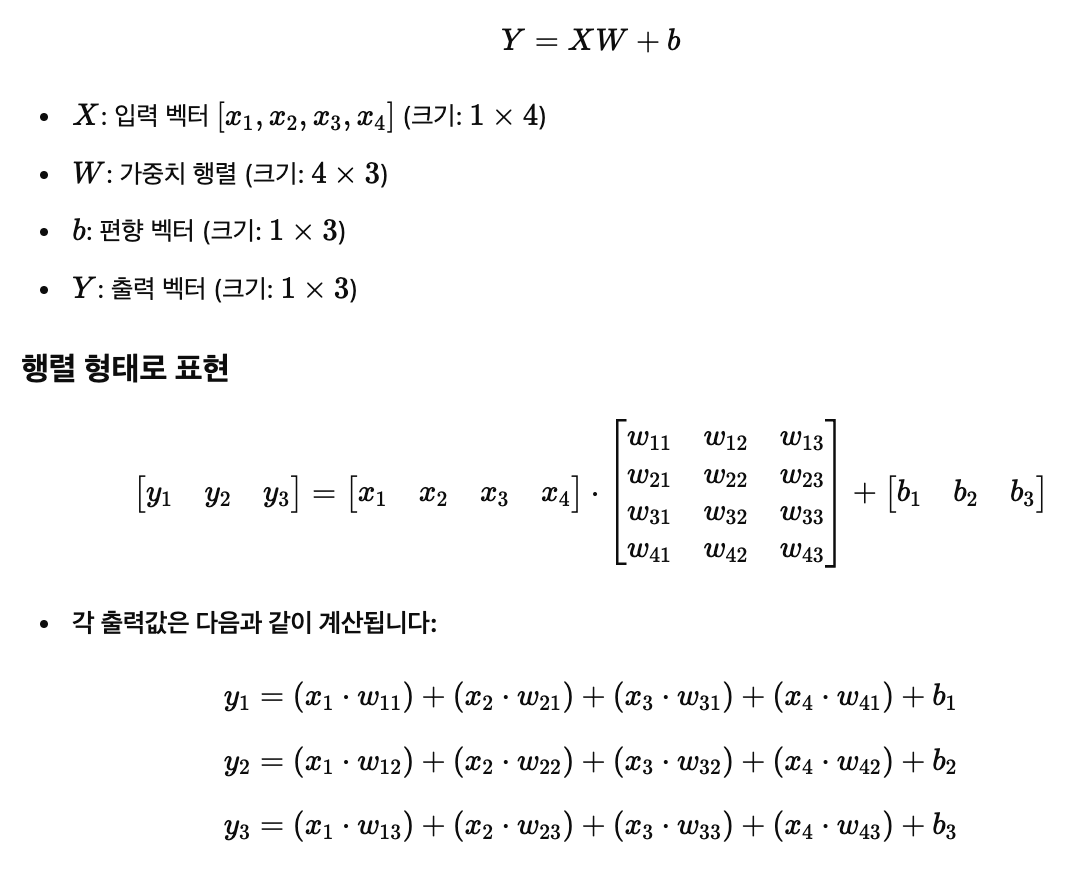

In [43]:
y_pred = model(x_train)
y_pred

tensor([[ 4.2779e-01, -1.4158e-02,  1.8575e+00],
        [-6.7736e-02,  1.0713e+00,  2.0451e+00],
        [-9.1653e-01,  1.5317e+00,  3.4862e+00],
        [-8.2622e-01,  2.1275e+00,  5.1114e+00],
        [ 2.7269e-01,  4.8637e-01,  6.7390e+00],
        [-1.5251e+00,  1.2540e+00,  7.0789e+00],
        [-1.4520e-04,  8.9984e-01,  8.7006e+00],
        [-3.7987e-01,  1.2132e+00,  9.7089e+00],
        [-3.4109e-01,  1.0880e+00,  8.4885e+00],
        [-6.7300e-02,  1.1041e+00,  7.5766e+00]], grad_fn=<AddmmBackward0>)

### CrossEntropyLoss

CrossEntropyLoss는 다중 클래스 분류(Multiclass Classification) 문제에서 모델의 예측과 실제 정답 레이블 간의 차이를 측정하는 손실 함수(Loss Function)입니다. 이 함수는 모델이 예측한 확률 분포와 실제 레이블(정답) 간의 불확실성을 수치화합니다. CrossEntropyLoss는 주로 Softmax 함수와 함께 사용됩니다. Softmax는 각 클래스에 대한 확률 분포를 제공하며, CrossEntropyLoss는 이 확률 분포와 실제 레이블 간의 차이를 계산합니다. 예측이 실제 레이블과 가까울수록 손실 값이 작아지며, 예측이 틀릴수록 손실 값은 커집니다

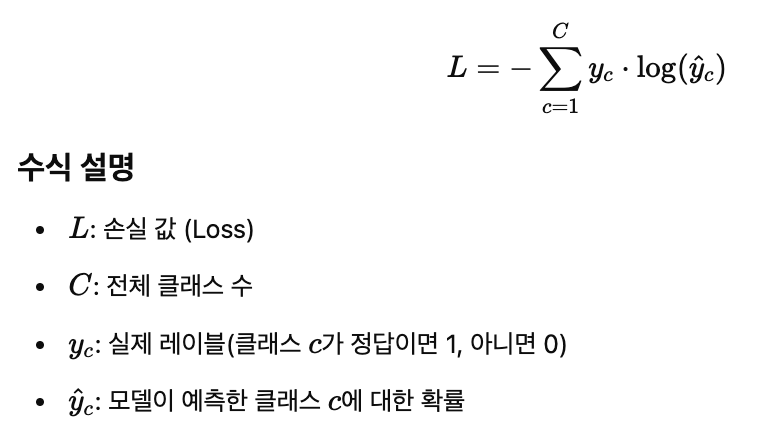

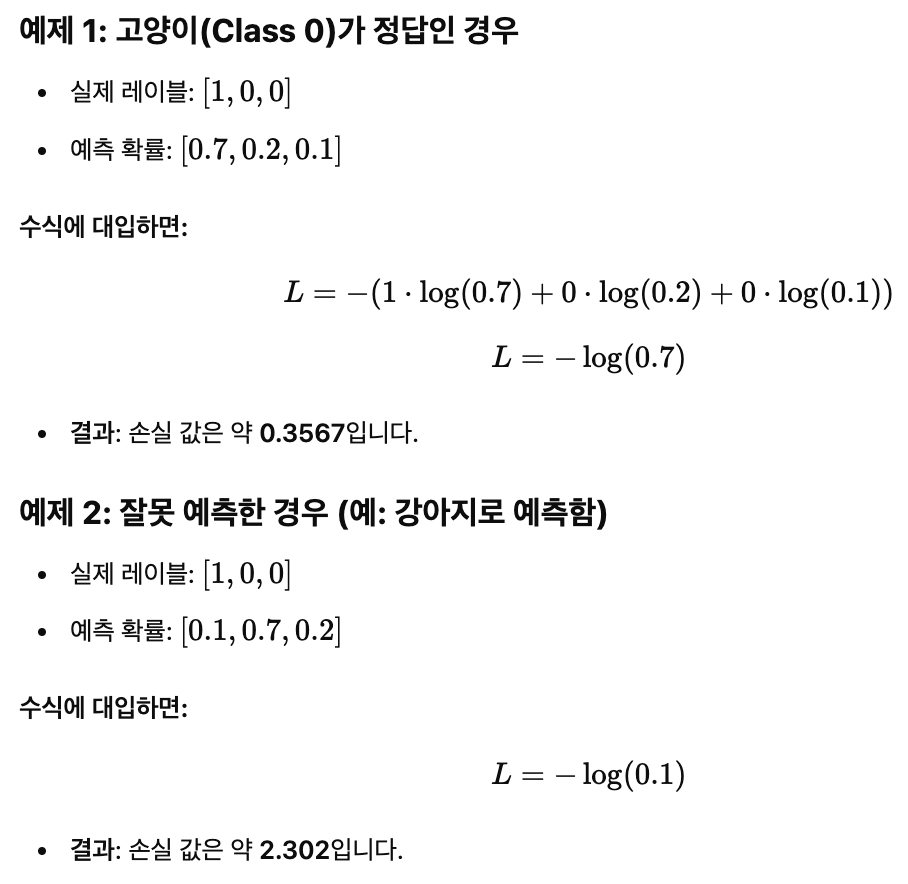

### Softmax

Softmax 함수는 다중 클래스 분류(Multiclass Classification) 문제에서 사용되는 활성화 함수(Activation Function)입니다. 이 함수는 주어진 입력 벡터의 각 요소를 확률 분포(probability distribution)로 변환합니다. 즉, 각 클래스에 대한 예측값을 0과 1 사이의 값으로 변환하며, 모든 클래스의 확률 합이 항상 1이 되도록 정규화합니다.

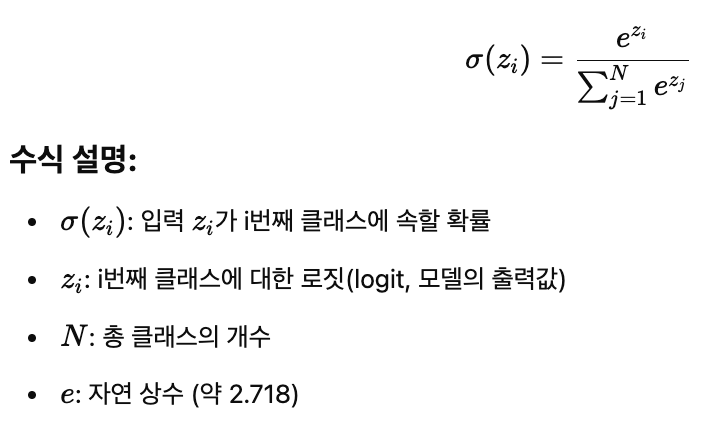

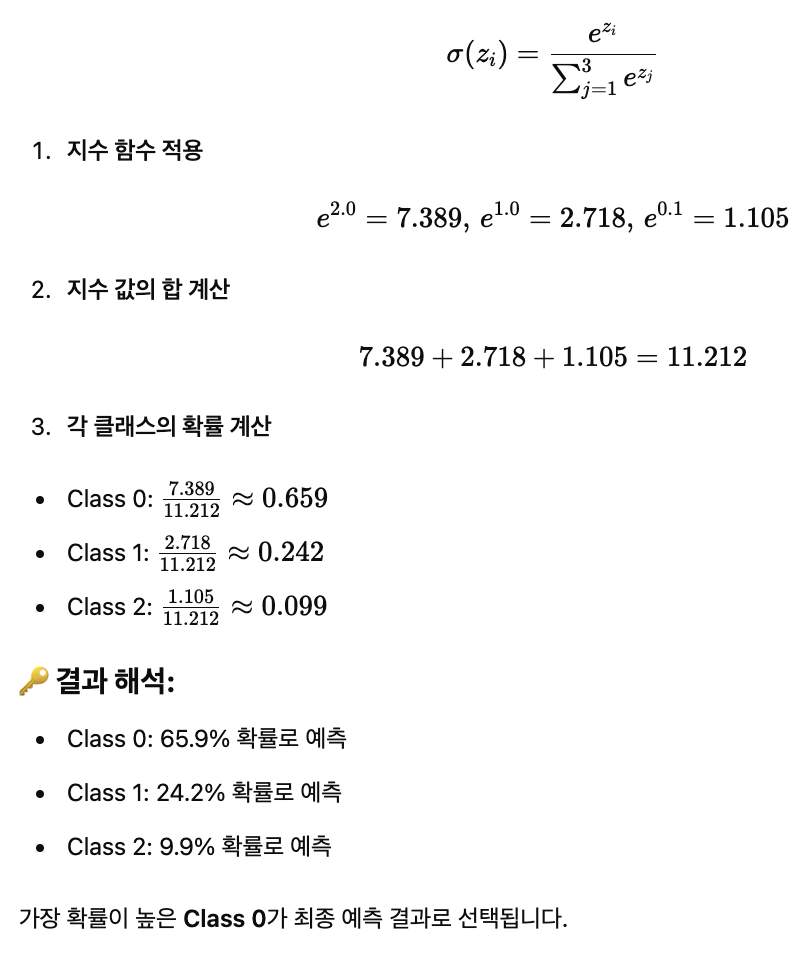

In [44]:
loss = nn.CrossEntropyLoss()(y_pred, y_train)
loss

tensor(2.3948, grad_fn=<NllLossBackward0>)

In [45]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [46]:
epochs = 10000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.CrossEntropyLoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}/{epochs} Loss: {loss: .6f}')

Epoch: 0/10000 Loss:  2.394805
Epoch: 100/10000 Loss:  0.728663
Epoch: 200/10000 Loss:  0.651991
Epoch: 300/10000 Loss:  0.619642
Epoch: 400/10000 Loss:  0.599902
Epoch: 500/10000 Loss:  0.585164
Epoch: 600/10000 Loss:  0.572989
Epoch: 700/10000 Loss:  0.562399
Epoch: 800/10000 Loss:  0.552923
Epoch: 900/10000 Loss:  0.544305
Epoch: 1000/10000 Loss:  0.536381
Epoch: 1100/10000 Loss:  0.529043
Epoch: 1200/10000 Loss:  0.522205
Epoch: 1300/10000 Loss:  0.515806
Epoch: 1400/10000 Loss:  0.509790
Epoch: 1500/10000 Loss:  0.504117
Epoch: 1600/10000 Loss:  0.498747
Epoch: 1700/10000 Loss:  0.493650
Epoch: 1800/10000 Loss:  0.488799
Epoch: 1900/10000 Loss:  0.484170
Epoch: 2000/10000 Loss:  0.479743
Epoch: 2100/10000 Loss:  0.475499
Epoch: 2200/10000 Loss:  0.471423
Epoch: 2300/10000 Loss:  0.467501
Epoch: 2400/10000 Loss:  0.463720
Epoch: 2500/10000 Loss:  0.460070
Epoch: 2600/10000 Loss:  0.456542
Epoch: 2700/10000 Loss:  0.453126
Epoch: 2800/10000 Loss:  0.449814
Epoch: 2900/10000 Loss:  0

In [47]:
x_test = torch.FloatTensor([[2, 1, 3, 3]])
y_pred = model(x_test)
y_pred

tensor([[ 2.3792,  1.9395, -0.6481]], grad_fn=<AddmmBackward0>)

In [48]:
y_prob = nn.Softmax(1)(y_pred)
y_prob


tensor([[0.5908, 0.3806, 0.0286]], grad_fn=<SoftmaxBackward0>)

In [49]:
print(f'0일 확률: {y_prob[0][0]:.2f}')
print(f'1일 확률: {y_prob[0][1]:.2f}')
print(f'2일 확률: {y_prob[0][2]:.2f}')

0일 확률: 0.59
1일 확률: 0.38
2일 확률: 0.03


In [50]:
torch.argmax(y_prob, axis=1)

tensor([0])